DANA4840

# DANA4840

In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from joblib import Parallel, delayed
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy.stats import f_oneway
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score, silhouette_samples
import time
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist, squareform
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage, dendrogram,fcluster
import seaborn as sns
from scipy.stats import shapiro
#from pyclustertend import hopkins
from sklearn.metrics import silhouette_score, adjusted_rand_score, normalized_mutual_info_score
from scipy.spatial.distance import pdist, squareform
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


In [160]:
data = pd.read_csv("data.csv")
label = pd.read_csv("labels.csv")
display(data.head())
display(label.info())

,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  801 non-null    object
 1   Class       801 non-null    object
dtypes: object(2)
memory usage: 12.6+ KB


None

# Pre-processing of data

## Merge data

In [161]:
# Let's check if both labels have the same names 
list_labels=label.iloc[:,0].tolist()
list_df=data.iloc[:,0].tolist()
print((list_labels)==(list_df))

True


In [162]:
# Merge 2 dataset
merged_df = pd.merge(label,data,on='Unnamed: 0')
display(merged_df.head())
display(merged_df.info())
display(data.info())

,Unnamed: 0,Class,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,sample_0,PRAD,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,sample_1,LUAD,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,sample_2,PRAD,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,sample_3,PRAD,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,sample_4,BRCA,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Columns: 20533 entries, Unnamed: 0 to gene_20530
dtypes: float64(20531), object(2)
memory usage: 125.5+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Columns: 20532 entries, Unnamed: 0 to gene_20530
dtypes: float64(20531), object(1)
memory usage: 125.5+ MB


None

In [163]:
#check value counts of all samples
classes = merged_df['Unnamed: 0'].value_counts()
classes

Unnamed: 0
sample_0      1
sample_538    1
sample_528    1
sample_529    1
sample_530    1
             ..
sample_270    1
sample_271    1
sample_272    1
sample_273    1
sample_800    1
Name: count, Length: 801, dtype: int64

In [164]:
#describe the merged data distribution
merged_df.describe()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.0,801.000000,801.000000,801.000000,801.000000,...,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000
mean,0.026642,3.010909,3.095350,6.722305,9.813612,0.0,7.405509,0.499882,0.016744,0.013428,...,5.896573,8.765891,10.056252,4.847727,9.741987,11.742228,10.155271,9.590726,5.528177,0.095411
std,0.136850,1.200828,1.065601,0.638819,0.506537,0.0,1.108237,0.508799,0.133635,0.204722,...,0.746399,0.603176,0.379278,2.382728,0.533898,0.670371,0.580569,0.563849,2.073859,0.364529
min,0.000000,0.000000,0.000000,5.009284,8.435999,0.0,3.930747,0.000000,0.000000,0.000000,...,2.853517,6.678368,8.669456,0.000000,7.974942,9.045255,7.530141,7.864533,0.593975,0.000000
25%,0.000000,2.299039,2.390365,6.303346,9.464466,0.0,6.676042,0.000000,0.000000,0.000000,...,5.454926,8.383834,9.826027,3.130750,9.400747,11.315857,9.836525,9.244219,4.092385,0.000000
50%,0.000000,3.143687,3.127006,6.655893,9.791599,0.0,7.450114,0.443076,0.000000,0.000000,...,5.972582,8.784144,10.066385,5.444935,9.784524,11.749802,10.191207,9.566511,5.218618,0.000000
75%,0.000000,3.883484,3.802534,7.038447,10.142324,0.0,8.121984,0.789354,0.000000,0.000000,...,6.411292,9.147136,10.299025,6.637412,10.082269,12.177852,10.578561,9.917888,6.876382,0.000000
max,1.482332,6.237034,6.063484,10.129528,11.355621,0.0,10.718190,2.779008,1.785592,4.067604,...,7.771054,11.105431,11.318243,9.207495,11.811632,13.715361,11.675653,12.813320,11.205836,5.254133


In [165]:
merged_df

,Unnamed: 0,Class,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,sample_0,PRAD,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.000000
1,sample_1,LUAD,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.000000
2,sample_2,PRAD,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.000000
3,sample_3,PRAD,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.000000
4,sample_4,BRCA,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,sample_796,BRCA,0.0,1.865642,2.718197,7.350099,10.006003,0.0,6.764792,0.496922,...,6.088133,9.118313,10.004852,4.484415,9.614701,12.031267,9.813063,10.092770,8.819269,0.000000
797,sample_797,LUAD,0.0,3.942955,4.453807,6.346597,10.056868,0.0,7.320331,0.000000,...,6.371876,9.623335,9.823921,6.555327,9.064002,11.633422,10.317266,8.745983,9.659081,0.000000
798,sample_798,COAD,0.0,3.249582,3.707492,8.185901,9.504082,0.0,7.536589,1.811101,...,5.719386,8.610704,10.485517,3.589763,9.350636,12.180944,10.681194,9.466711,4.677458,0.586693
799,sample_799,PRAD,0.0,2.590339,2.787976,7.318624,9.987136,0.0,9.213464,0.000000,...,5.785237,8.605387,11.004677,4.745888,9.626383,11.198279,10.335513,10.400581,5.718751,0.000000


## Missing values

In [166]:
#checking missing values
merged_df[merged_df.isnull().sum(axis=1) > 0]

,Unnamed: 0,Class,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530


## Duplicated values

In [167]:
merged_df.duplicated().sum()

0

In [168]:
# drop "unnamed: 0" column since its not necessary
merged_df.drop('Unnamed: 0', axis=1, inplace=True)
display(merged_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Columns: 20532 entries, Class to gene_20530
dtypes: float64(20531), object(1)
memory usage: 125.5+ MB


None

Class
BRCA    300
KIRC    146
LUAD    141
PRAD    136
COAD     78
Name: count, dtype: int64

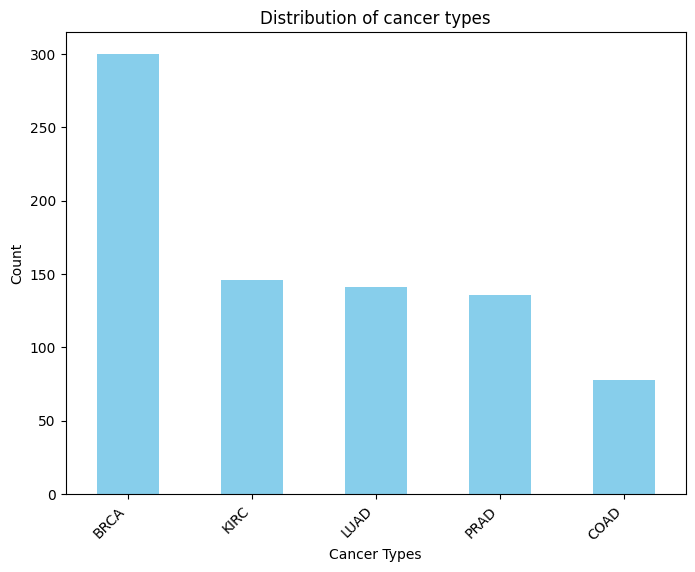

In [169]:
# Count the occurrences of each class
class_counts = merged_df['Class'].value_counts()
display(class_counts)
# Plotting the bar chart
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of cancer types')
plt.xlabel('Cancer Types')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  
plt.show()

## Remove the gene columns with many 0 value

+ Indentify and remove genes if std deviation equal to 0
+ Indentify and remove genes if 1st quantile = 3rd quantile

In [170]:
# Calculate standard deviation for each gene
gene_std_dev = merged_df.iloc[:, 1:].std(axis=0)

# Identify genes with std deviation equal to 0
genes_to_remove_std = gene_std_dev[gene_std_dev == 0].index

# Calculate the 1st and 3rd quantiles for each gene
gene_quantiles = merged_df.iloc[:, 1:].quantile([0.25, 0.75], axis=0)

# Identify genes where the 1st quantile is equal to the 3rd quantile
genes_to_remove_quantile = gene_quantiles.columns[(gene_quantiles.loc[0.25] == gene_quantiles.loc[0.75]).values]

# Combine both lists of genes to remove
genes_to_remove = np.union1d(genes_to_remove_std, genes_to_remove_quantile)

# Remove identified genes from the DataFrame
filter_df = merged_df.drop(columns=genes_to_remove)

# Display the resulting DataFrame
display(filter_df)

,Class,gene_1,gene_2,gene_3,gene_4,gene_6,gene_7,gene_10,gene_11,gene_12,...,gene_20520,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529
0,PRAD,2.017209,3.265527,5.478487,10.431999,7.175175,0.591871,0.591871,1.334282,2.015391,...,7.205236,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759
1,LUAD,0.592732,1.588421,7.586157,9.623011,6.816049,0.000000,0.000000,0.587845,2.466601,...,10.639259,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168
2,PRAD,3.511759,4.327199,6.881787,9.870730,6.972130,0.452595,0.000000,0.452595,1.981122,...,10.336027,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023
3,PRAD,3.663618,4.507649,6.659068,10.196184,7.843375,0.434882,0.000000,0.434882,2.874246,...,9.194823,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001
4,BRCA,2.655741,2.821547,6.539454,9.738265,6.566967,0.360982,0.000000,1.275841,2.141204,...,9.298775,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,BRCA,1.865642,2.718197,7.350099,10.006003,6.764792,0.496922,0.000000,0.000000,3.328722,...,7.918774,6.088133,9.118313,10.004852,4.484415,9.614701,12.031267,9.813063,10.092770,8.819269
797,LUAD,3.942955,4.453807,6.346597,10.056868,7.320331,0.000000,0.000000,1.049282,2.666211,...,9.066880,6.371876,9.623335,9.823921,6.555327,9.064002,11.633422,10.317266,8.745983,9.659081
798,COAD,3.249582,3.707492,8.185901,9.504082,7.536589,1.811101,7.448149,4.049317,3.464198,...,9.965236,5.719386,8.610704,10.485517,3.589763,9.350636,12.180944,10.681194,9.466711,4.677458
799,PRAD,2.590339,2.787976,7.318624,9.987136,9.213464,0.000000,1.578746,1.800703,3.635255,...,7.018634,5.785237,8.605387,11.004677,4.745888,9.626383,11.198279,10.335513,10.400581,5.718751


In [171]:
filter_df.describe()

,gene_1,gene_2,gene_3,gene_4,gene_6,gene_7,gene_10,gene_11,gene_12,gene_13,...,gene_20520,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,...,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000
mean,3.010909,3.095350,6.722305,9.813612,7.405509,0.499882,0.688177,0.955504,2.667291,0.318108,...,8.788809,5.896573,8.765891,10.056252,4.847727,9.741987,11.742228,10.155271,9.590726,5.528177
std,1.200828,1.065601,0.638819,0.506537,1.108237,0.508799,1.173568,0.877319,0.705767,0.673289,...,1.265211,0.746399,0.603176,0.379278,2.382728,0.533898,0.670371,0.580569,0.563849,2.073859
min,0.000000,0.000000,5.009284,8.435999,3.930747,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.077841,2.853517,6.678368,8.669456,0.000000,7.974942,9.045255,7.530141,7.864533,0.593975
25%,2.299039,2.390365,6.303346,9.464466,6.676042,0.000000,0.000000,0.395831,2.243852,0.000000,...,7.834736,5.454926,8.383834,9.826027,3.130750,9.400747,11.315857,9.836525,9.244219,4.092385
50%,3.143687,3.127006,6.655893,9.791599,7.450114,0.443076,0.360196,0.801076,2.702214,0.000000,...,8.826501,5.972582,8.784144,10.066385,5.444935,9.784524,11.749802,10.191207,9.566511,5.218618
75%,3.883484,3.802534,7.038447,10.142324,8.121984,0.789354,0.903887,1.373899,3.153092,0.427606,...,9.776425,6.411292,9.147136,10.299025,6.637412,10.082269,12.177852,10.578561,9.917888,6.876382
max,6.237034,6.063484,10.129528,11.355621,10.718190,2.779008,12.293023,7.884439,4.783661,5.547931,...,11.873836,7.771054,11.105431,11.318243,9.207495,11.811632,13.715361,11.675653,12.813320,11.205836


# EDA

Class
BRCA    300
KIRC    146
LUAD    141
PRAD    136
COAD     78
Name: count, dtype: int64

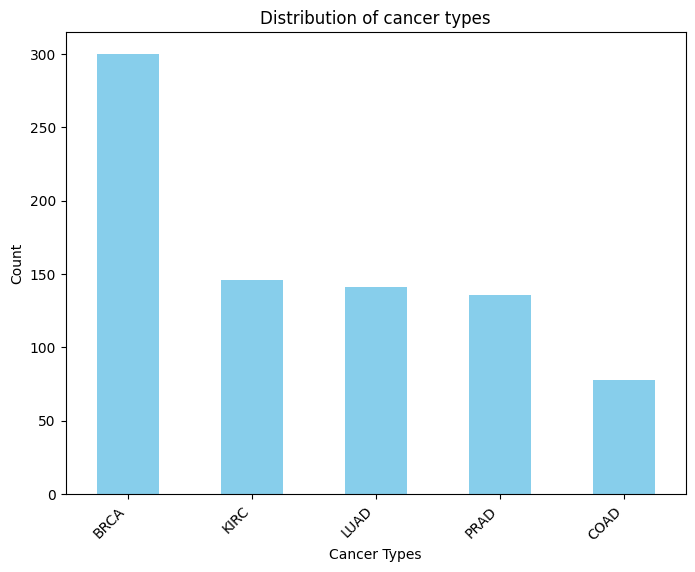

In [172]:
# Count the occurrences of each class
class_counts = filter_df['Class'].value_counts()
display(class_counts)
# Plotting the bar chart
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of cancer types')
plt.xlabel('Cancer Types')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  
plt.show()

In [173]:
df_pivot=pd.pivot_table(filter_df,index=["Class"],aggfunc="mean")
df_pivot

,gene_1,gene_10,gene_100,gene_1000,gene_10000,gene_10001,gene_10002,gene_10003,gene_10004,gene_10005,...,gene_9989,gene_999,gene_9990,gene_9991,gene_9992,gene_9993,gene_9994,gene_9995,gene_9997,gene_9999
Class,,,,,,,,,,,,,,,,,,,,,
BRCA,2.839739,0.544066,10.681488,10.303568,3.258028,7.339461,7.900497,7.489146,7.508378,2.723460,...,5.429846,11.362664,1.969278,5.142237,1.736160,2.312551,1.696127,2.493789,2.099709,6.954733
COAD,3.438381,0.357278,11.015745,9.951124,3.462039,5.526673,7.487396,3.783493,6.959238,2.009193,...,5.285978,10.798063,2.216178,0.354828,1.833606,1.619692,3.839205,2.396207,2.298246,6.618466
KIRC,2.398129,1.166824,10.238999,11.148094,1.651798,6.895752,7.686932,7.269611,7.636246,2.951443,...,5.323637,11.380931,1.824964,0.596508,2.393303,1.872888,1.289448,3.139623,2.387948,6.429343
LUAD,3.358260,0.607541,10.517670,10.503698,3.754181,7.281878,7.041924,6.145042,7.148682,2.498717,...,5.033744,11.072819,2.609490,2.801700,2.738326,1.869805,2.217144,2.459608,2.281828,6.721517
PRAD,3.441041,0.765608,10.282936,9.967433,1.949878,7.946141,8.529695,5.696368,7.396572,3.177847,...,6.452603,11.554185,1.623491,4.594215,1.684084,2.588050,1.703772,3.568490,3.621548,7.104225


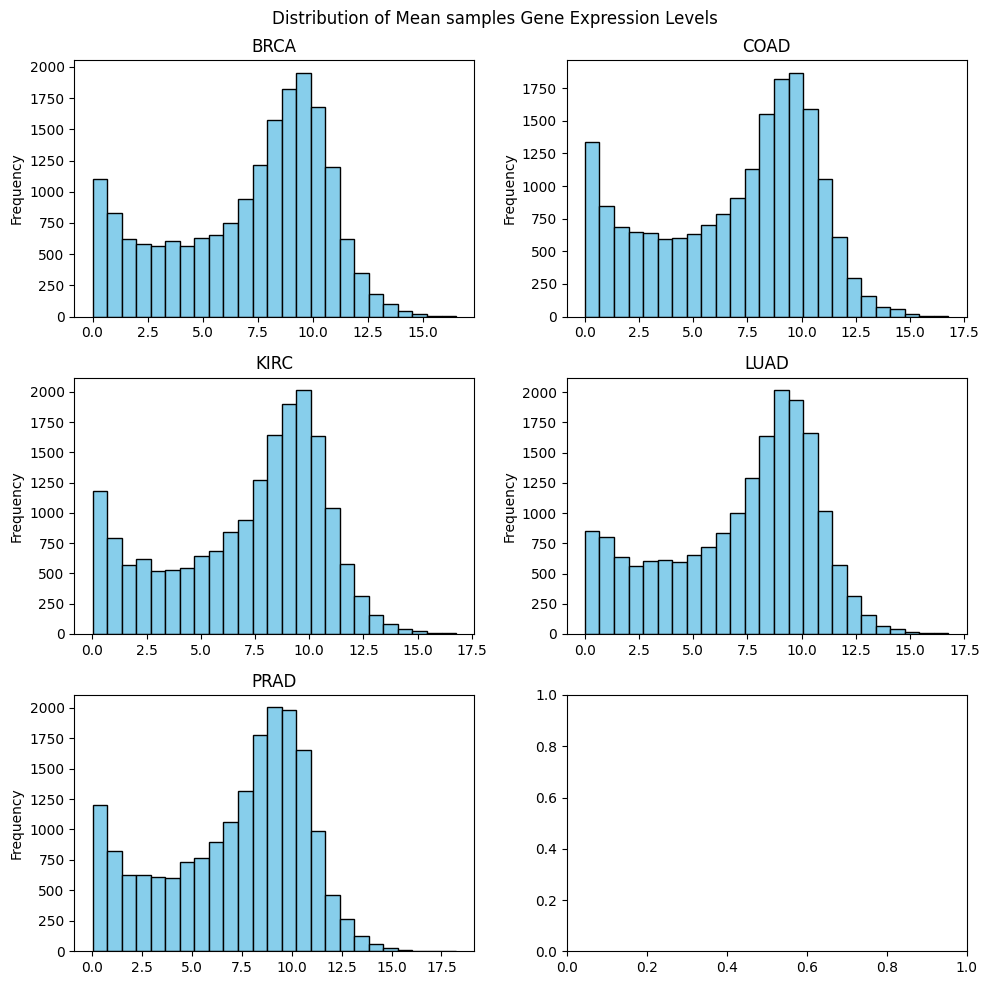

In [174]:
# We will use the mean of the all samples across the genes to see the distribution of the data across the classes
# We will make subplot of the histogram to see the distribution of the data across the classes

cancer_names = df_pivot.index.tolist()
fig, axes = plt.subplots(3, 2, figsize=(10, 10))
fig.suptitle('Distribution of Mean samples Gene Expression Levels')
for i, ax in enumerate(cancer_names):
    df_pivot.loc[ax].plot(kind="hist", ax=axes[i//2, i%2], title=ax,color='skyblue', edgecolor='black',bins=25)
plt.tight_layout()
plt.show()

In [175]:
# Perform shapiro test to see if the data is normally distributed or not


for i in range(5):
    stat, p = shapiro(df_pivot.iloc[i,:])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    
    alpha = 0.05
    if p > alpha:
        print("The mean distribution is normal (fail to reject H0)")
    else:
        print("The mean distribution is not normal (reject H0)")

Statistics=0.937, p=0.000
The mean distribution is not normal (reject H0)
Statistics=0.938, p=0.000
The mean distribution is not normal (reject H0)
Statistics=0.937, p=0.000
The mean distribution is not normal (reject H0)
Statistics=0.942, p=0.000
The mean distribution is not normal (reject H0)
Statistics=0.943, p=0.000
The mean distribution is not normal (reject H0)


/Users/minhnguyetnguyen/anaconda3/lib/python3.10/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


# Feature selection

## ANOVA

We perform Anova to test the sigificance of genes across classes of cancer

Null Hypothesis (H₀):

"There is no significant difference in the mean expression levels of the genes across the five classes of cancer."

Alternative Hypothesis (Hₐ):

"There is a significant difference in the mean expression levels of at least one gene across the five classes of cancer."

In [176]:
class_df = filter_df['Class']
gene_expression = filter_df.drop(columns=['Class'])

# Dictionary to store ANOVA results for each gene
anova_results = {}

# Loop through each gene
for gene in gene_expression.columns:
    # Separate gene expression data for each class
    class_data = [gene_expression[gene][class_df == cancer] for cancer in class_df.unique()]

    # Perform ANOVA for the gene
    f_stat, p_value = f_oneway(*class_data)
    # Store results only if p-value < 0.05 (i.e., Reject H0)
    if p_value < 0.05:
        anova_results[gene] = {'F-statistic': f_stat, 'p-value': p_value}

    # Store ANOVA results in the dictionary
    #anova_results[gene] = {'f_statistic': f_stat, 'p_value': p_value}

# Convert the dictionary to a DataFrame for easier analysis
anova_df = pd.DataFrame.from_dict(anova_results, orient='index')

# Display the ANOVA results DataFrame
print(anova_df)

            F-statistic       p-value
gene_1        23.112465  4.315349e-18
gene_2        60.132731  2.146884e-44
gene_3       114.259977  5.472971e-77
gene_4        37.117862  1.743688e-28
gene_6        10.897032  1.320470e-08
...                 ...           ...
gene_20525    53.033123  1.234580e-39
gene_20526    25.051963  1.454614e-19
gene_20527     6.847119  2.023799e-05
gene_20528    21.881278  3.757978e-17
gene_20529    31.709717  1.545891e-24

[18494 rows x 2 columns]


After Anova, we chose 18494 genes columns that are significant

In [177]:
reduced_genes_df = pd.merge(left=filter_df.T, right=anova_df, left_index=True, right_index=True)
reduced_genes_df=reduced_genes_df.iloc[:, :-2]
reduced_genes_df=reduced_genes_df.T

display(class_df.info())
display(reduced_genes_df.info())

<class 'pandas.core.series.Series'>
RangeIndex: 801 entries, 0 to 800
Series name: Class
Non-Null Count  Dtype 
--------------  ----- 
801 non-null    object
dtypes: object(1)
memory usage: 6.4+ KB


None

<class 'pandas.core.frame.DataFrame'>
Index: 801 entries, 0 to 800
Columns: 18494 entries, gene_1 to gene_20529
dtypes: object(18494)
memory usage: 113.0+ MB


None

In [178]:
reduced_genes_df = reduced_genes_df.apply(pd.to_numeric, errors='coerce')

In [179]:
#checking missing values again
reduced_genes_df[reduced_genes_df.isnull().sum(axis=1) > 0]

,gene_1,gene_2,gene_3,gene_4,gene_6,gene_7,gene_10,gene_11,gene_12,gene_13,...,gene_20520,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529


In [180]:
reduced_genes_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 801 entries, 0 to 800
Columns: 18494 entries, gene_1 to gene_20529
dtypes: float64(18494)
memory usage: 113.1+ MB


In [181]:
# checking zero values in column
zero_counts = reduced_genes_df.iloc[:, 1:].eq(0).sum(axis=1)

# Display the DataFrame with the zero counts
print("Number of Zeros in Each Row:")
print(zero_counts)

Number of Zeros in Each Row:
0       986
1      1108
2      1719
3      1056
4       980
       ... 
796    1399
797    1254
798     428
799     821
800    1066
Length: 801, dtype: int64


In [182]:
threshold = 0.25 * 18494  # 20% of 18494 columns

# Count rows with more than 20% zeros
rows_above_threshold = (zero_counts > threshold).sum()
rows_above_threshold

0

There is no columns containing 20% of zero, so we keep all columns in reduced_genes_df dataset

## PCA - Dimention reduction

after identifing genes with significant differences in mean expression levels across the five classes of cancer, performing Principal Component Analysis (PCA) on the subset of genes with significant differences

In [183]:
X = reduced_genes_df

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [184]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

Number of components to explain 80% variance: 142


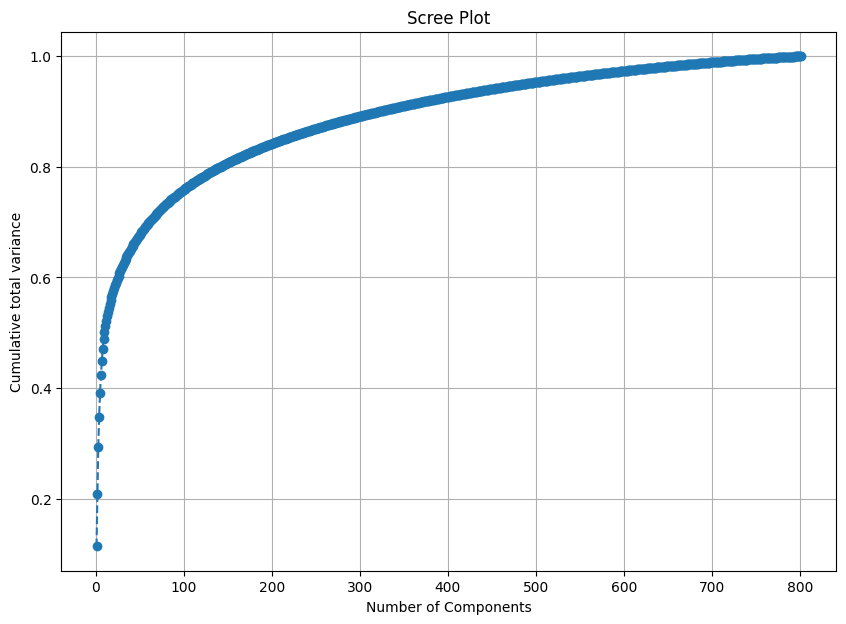

In [185]:
#Total variation
# Cumulative variance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Determine the number of components to explain desired variance, e.g., 80%
variance_threshold = 0.8
components_needed = np.argmax(cumulative_variance_ratio >= variance_threshold) + 1
print("Number of components to explain 80% variance:", components_needed)
plt.figure(figsize=(10, 7))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative total variance')
#plt.axhline(y=1, color='r', linestyle='-')
plt.grid(True)
plt.show()

In [186]:
#### Kaise Criterion
# Eigenvalues >mean
mean_eigenvalue = np.mean(pca.explained_variance_)

# Components with eigenvalues > mean of eigenvalue
components_to_keep = pca.explained_variance_ > mean_eigenvalue
print("Components to keep based on eigenvalue criterion:", components_to_keep.sum())
print("mean_eigenvalue:",mean_eigenvalue)

Components to keep based on eigenvalue criterion: 94
mean_eigenvalue: 23.1175


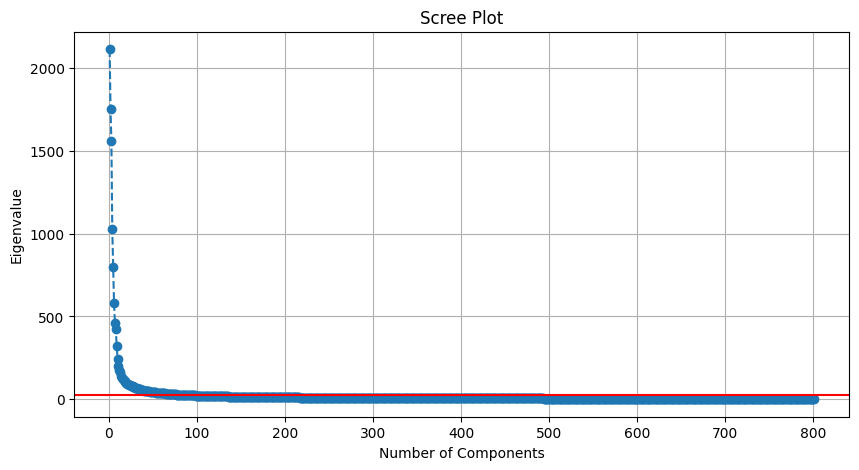

In [187]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(pca.explained_variance_) + 1), pca.explained_variance_, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Eigenvalue')
plt.axhline(y=mean_eigenvalue, color='r', linestyle='-')
plt.grid(True)
plt.show()


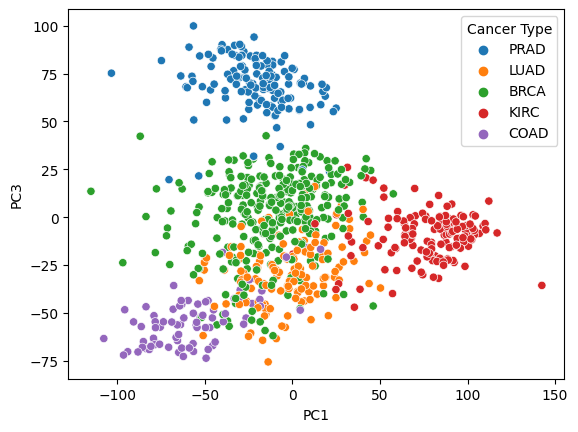

In [188]:

#PC=142
pca_142 = PCA(n_components=142)  
X_pca_142 = pca_142.fit_transform(X_scaled)

# Create a DataFrame for the PCA results
pca142 = pd.DataFrame(data=X_pca_142, columns=[f'PC{i+1}' for i in range(142)])

# Add the cancer type information back into the DataFrame
pca142['Cancer Type'] = class_df

# Plot the first two principal components
sns.scatterplot(x='PC1', y='PC3', hue='Cancer Type', data=pca142)
plt.show()

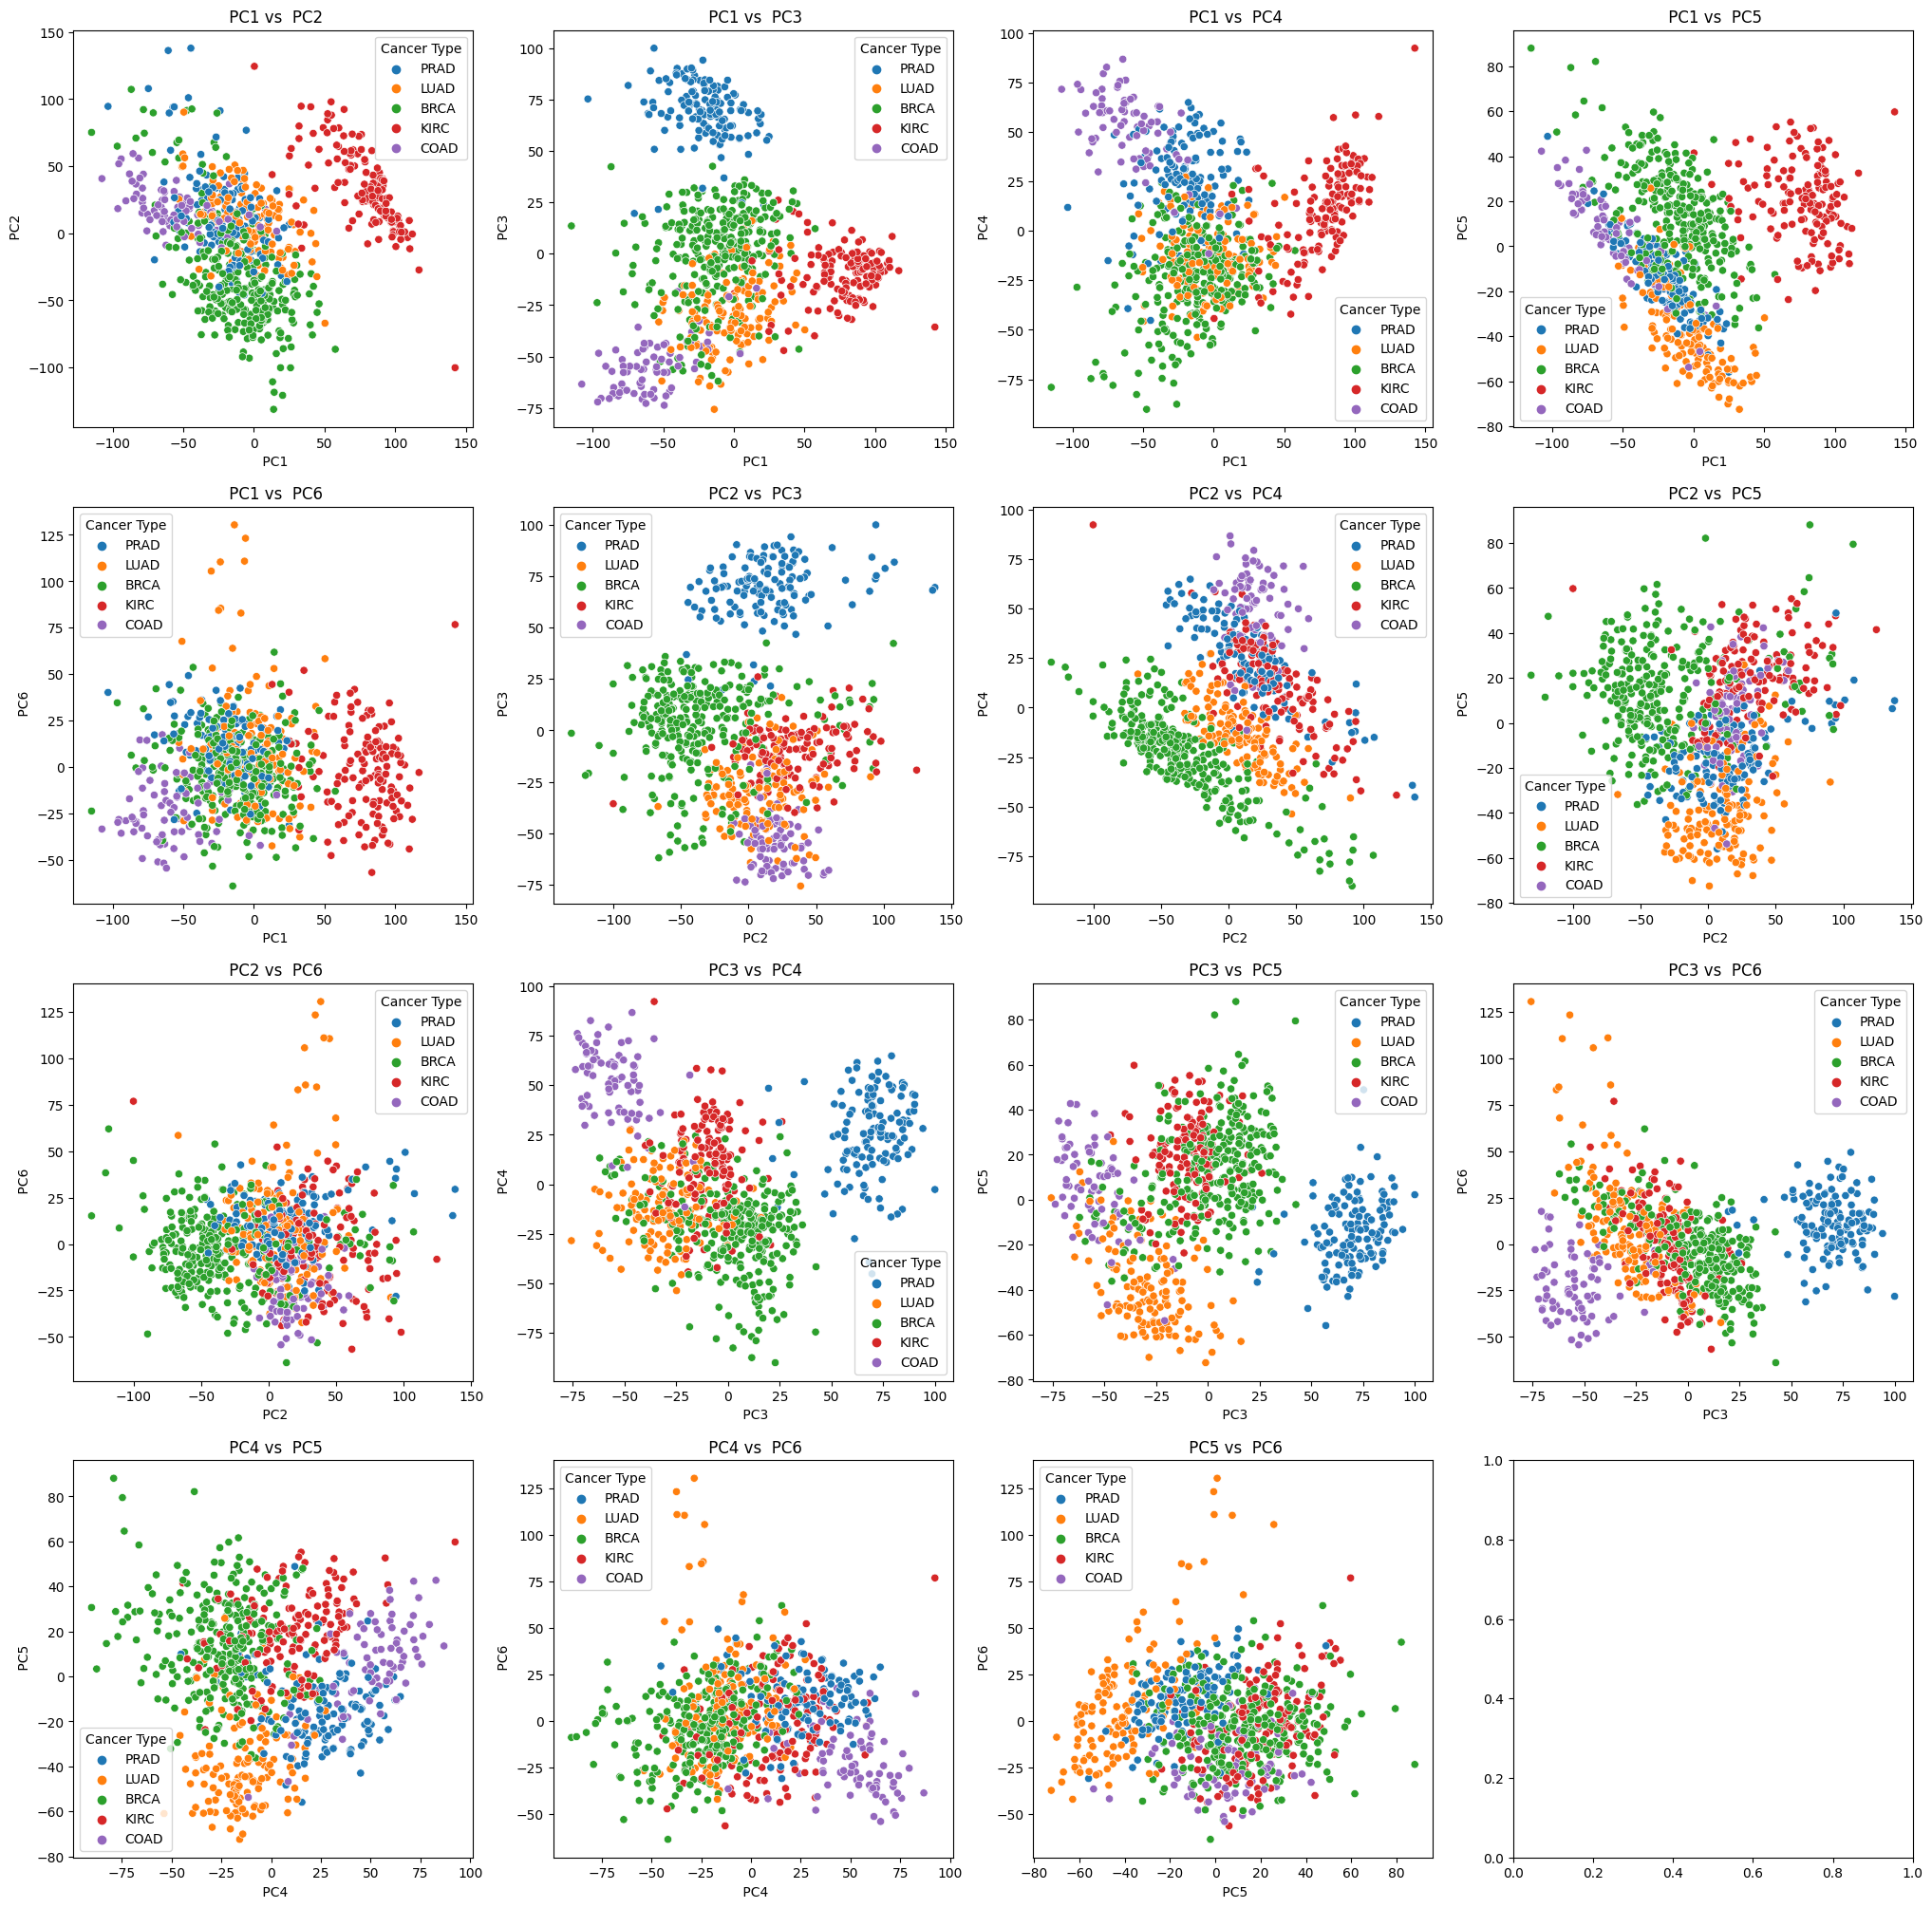

In [189]:
import itertools 

pca_components_to_plot=pca142.columns[0:6].tolist()

fig,axes=plt.subplots(len(pca_components_to_plot)-2,len(pca_components_to_plot)-2,figsize=(25,25))

axes=axes.flatten()

for i,(pc1,pc2) in enumerate(itertools.combinations(pca_components_to_plot,2)):
    sns.scatterplot(data=pca142,x=pc1,y=pc2,hue="Cancer Type",ax=axes[i],legend="full")
    axes[i].set_title(f" {pc1} vs  {pc2}")
    axes[i].set_xlabel(f" {pc1}")
    axes[i].set_ylabel(f" {pc2}")

Principal Component 3 seems can do a good clustering of PRAD and BRCA

Principal Component 1 seems can do a good clustering of KIRC

Principal Component 2 seems can do a good clustering of BRCA

In [190]:
# Access the loadings for PC1
loadings_pc1 = pca_142.components_[0]  

# Create a DataFrame to store the features and their loadings for PC1
features_loadings_pc1 = pd.DataFrame({'Feature': reduced_genes_df.columns, 'Loading_PC1': loadings_pc1})

# Sort the features based on their absolute loadings
features_loadings_pc1 = features_loadings_pc1.reindex(features_loadings_pc1['Loading_PC1'].abs().sort_values(ascending=False).index)

# Display the top features contributing to PC1
print("Top features contributing to PC1:")
print(features_loadings_pc1.head(10))

Top features contributing to PC1:
          Feature  Loading_PC1
17838  gene_19862     0.019137
15496  gene_17360     0.019089
12193  gene_13489     0.019070
13717  gene_15158     0.018892
6559    gene_7031     0.018818
6548    gene_7019     0.018767
9944   gene_10788     0.018743
6120    gene_6543     0.018678
12211  gene_13507    -0.018677
13468  gene_14891     0.018646


Principal Component 2 seems can do a good clustering of BRCA

In [191]:
# Access the loadings for PC2
loadings_pc2 = pca_142.components_[1]  

# Create a DataFrame to store the features and their loadings for PC2
features_loadings_pc2 = pd.DataFrame({'Feature': reduced_genes_df.columns, 'Loading_PC2': loadings_pc2})

# Sort the features based on their absolute loadings
features_loadings_pc2 = features_loadings_pc2.reindex(features_loadings_pc2['Loading_PC2'].abs().sort_values(ascending=False).index)

# Display the top features contributing to PC2
print("Top features contributing to PC2:")
print(features_loadings_pc2.head(10))

Top features contributing to PC2:
          Feature  Loading_PC2
3400    gene_3612    -0.020377
1165    gene_1222     0.019936
13294  gene_14699    -0.019934
966     gene_1010     0.019915
17488  gene_19498     0.019600
1062    gene_1113    -0.019535
3391    gene_3603    -0.019431
334      gene_364    -0.019382
10296  gene_11153     0.019300
17842  gene_19866     0.019255


In [192]:
# Access the loadings for PC3
loadings_pc3 = pca_142.components_[2]  # PC3 is at index 2 since indexing starts from 0

# Create a DataFrame to store the features and their loadings for PC3
features_loadings_pc3 = pd.DataFrame({'Feature': reduced_genes_df.columns, 'Loading_PC3': loadings_pc3})

# Sort the features based on their absolute loadings
features_loadings_pc3 = features_loadings_pc3.reindex(features_loadings_pc3['Loading_PC3'].abs().sort_values(ascending=False).index)

# Display the top features contributing to PC3
print("Top features contributing to PC3:")
print(features_loadings_pc3.head(10))

Top features contributing to PC3:
          Feature  Loading_PC3
1085    gene_1137     0.021339
11008  gene_11910     0.020766
3516    gene_3737     0.020700
8466    gene_9075     0.020674
18084  gene_20109     0.020565
8570    gene_9184     0.020439
8562    gene_9175     0.020303
6694    gene_7178     0.020258
14213  gene_15688     0.020230
4177    gene_4456     0.020156


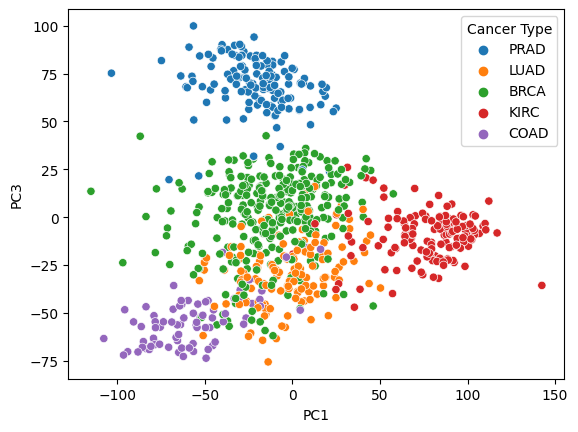

In [193]:
#PC=94
pca_94 = PCA(n_components=94)  
X_pca_94 = pca_94.fit_transform(X_scaled)

# Create a DataFrame for the PCA results
pca94 = pd.DataFrame(data=X_pca_94, columns=[f'PC{i+1}' for i in range(94)])

# Add the cancer type information back into the DataFrame
pca94['Cancer Type'] = class_df

# Plot the first two principal components
sns.scatterplot(x='PC1', y='PC3', hue='Cancer Type', data=pca94)
plt.show()

# Assesing clustering tendency

In [194]:
#hopkins_statistic = hopkins(scaled_data, pca142.shape[0])
#print("Hopkins Statistic:", hopkins_statistic)

In [195]:
#hopkins_statistic = hopkins(scaled_data, pca94.shape[0])
#print("Hopkins Statistic:", hopkins_statistic)

# Optimal number of cluster

/Users/minhnguyetnguyen/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/minhnguyetnguyen/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/minhnguyetnguyen/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/minhnguyetnguyen/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the w

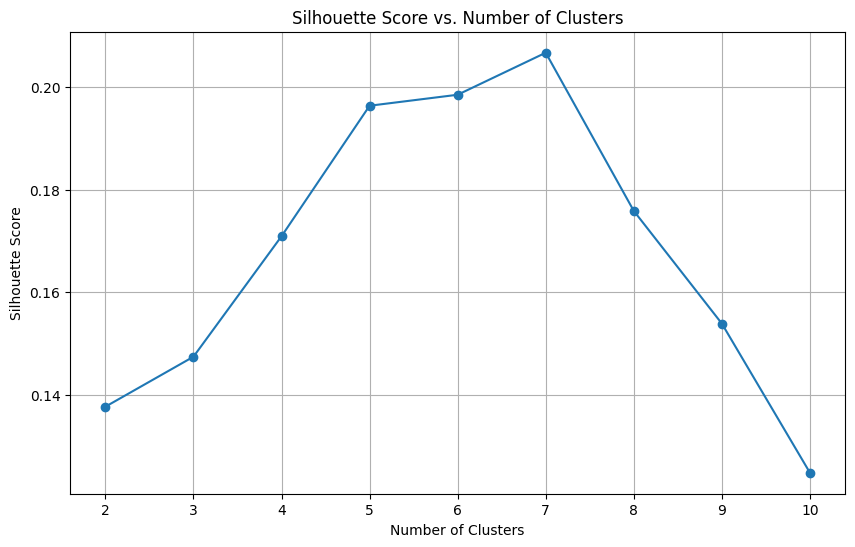

In [203]:

# Optimal number pf of cluster
silhouette_score(X_pca_142, class_df)

# Plot a silhouette score for the clusters

cluster_range = range(2, 11)  

# Initialize a list to store silhouette scores
silhouette_scores = []

# Iterate over each cluster number and compute the silhouette score
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(X_pca_142)
    silhouette_avg = silhouette_score(X_pca_142, clusters)
    silhouette_scores.append(silhouette_avg)


plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='-')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()

/Users/minhnguyetnguyen/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/minhnguyetnguyen/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/minhnguyetnguyen/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/minhnguyetnguyen/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the w

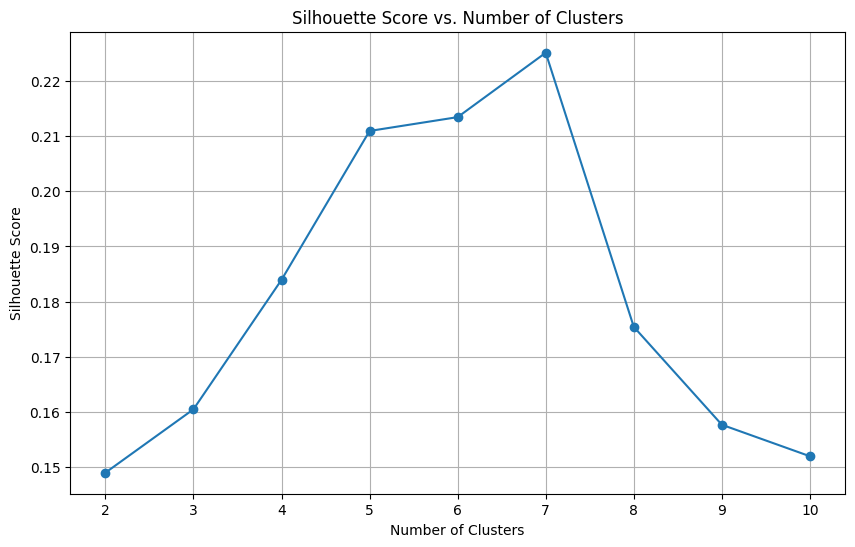

In [205]:

# Optimal number pf of cluster
silhouette_score(X_pca_94, class_df)

# Plot a silhouette score for the clusters

cluster_range = range(2, 11)  

# Initialize a list to store silhouette scores
silhouette_scores = []

# Iterate over each cluster number and compute the silhouette score
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(X_pca_94)
    silhouette_avg = silhouette_score(X_pca_94, clusters)
    silhouette_scores.append(silhouette_avg)


plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='-')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()

# K-means

#K-means with PCA = 142

In [206]:
#!pip install --upgrade threadpoolctl


X_142 = pca142.drop('Cancer Type', axis=1)

# Apply KMeans clustering
kmeans_142 = KMeans(n_clusters=5, n_init=10,random_state=42)
clusters_142 = kmeans_142.fit_predict(X_142)  # Fit and get cluster assignments

# Add cluster labels to the DataFrame
pca142['Cluster'] = clusters_142

# Print the cluster centers
#print(kmeans_142.cluster_centers_)
print(pca142['Cluster'].value_counts())

Cluster
4    250
0    198
3    145
2    134
1     74
Name: count, dtype: int64


In [207]:
#cross-tabulation of cluster labels and cancer types
cluster_cancer_142 = pca142.groupby(['Cluster', 'Cancer Type']).size().unstack(fill_value=0)
cluster_cancer_142

Cancer Type,BRCA,COAD,KIRC,LUAD,PRAD
Cluster,,,,,
0,53,4,1,139,1
1,0,74,0,0,0
2,0,0,0,0,134
3,0,0,145,0,0
4,247,0,0,2,1


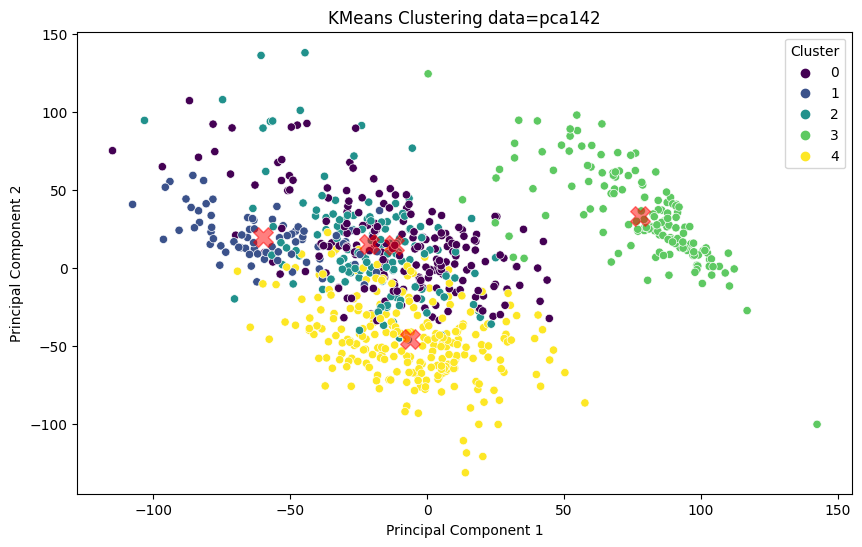

In [208]:
# Visualizing the clusters - we'll use the first two features for simplicity
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', palette='viridis', data=pca142)
centers = kmeans_142.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5, marker='X')
plt.title('KMeans Clustering data=pca142')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

#K-means with PCA = 94

In [209]:
X_94 = pca94.drop('Cancer Type', axis=1)

# Apply KMeans clustering
kmeans_94 = KMeans(n_clusters=5, n_init=10,random_state=42)
clusters_94 = kmeans_94.fit_predict(X_94)  # Fit and get cluster assignments

# Add cluster labels to the DataFrame
pca94['Cluster'] = clusters_94

# Print the cluster centers
#print(kmeans_142.cluster_centers_)
print(pca94['Cluster'].value_counts())

Cluster
0    252
1    195
2    145
3    135
4     74
Name: count, dtype: int64


In [210]:
#cross-tabulation of cluster labels and cancer types
cluster_cancer_94 = pca94.groupby(['Cluster', 'Cancer Type']).size().unstack(fill_value=0)
cluster_cancer_94

Cancer Type,BRCA,COAD,KIRC,LUAD,PRAD
Cluster,,,,,
0,249,0,0,2,1
1,50,4,1,139,1
2,0,0,145,0,0
3,1,0,0,0,134
4,0,74,0,0,0


In [211]:
from sklearn.metrics import confusion_matrix

# Use the mean of true labels within each cluster as the predicted label
predicted_labels = pca94.groupby('Cluster')['Cancer Type'].apply(lambda x: x.mode().iloc[0]).reset_index(name='Predicted Cancer Type')

# Display the predicted labels for each cluster
print(predicted_labels)

# Create a confusion matrix
conf_matrix = confusion_matrix(pca94['Cancer Type'], pca94['Cluster'].map(predicted_labels.set_index('Cluster')['Predicted Cancer Type']))

# Display the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)
# Calculate accuracy
accuracy = np.sum(np.diag(conf_matrix)) / np.sum(conf_matrix)
print(f"Accuracy: {accuracy:.2%}")

   Cluster Predicted Cancer Type
0        0                  BRCA
1        1                  LUAD
2        2                  KIRC
3        3                  PRAD
4        4                  COAD
Confusion Matrix:
[[249   0   0  50   1]
 [  0  74   0   4   0]
 [  0   0 145   1   0]
 [  2   0   0 139   0]
 [  1   0   0   1 134]]
Accuracy: 92.51%


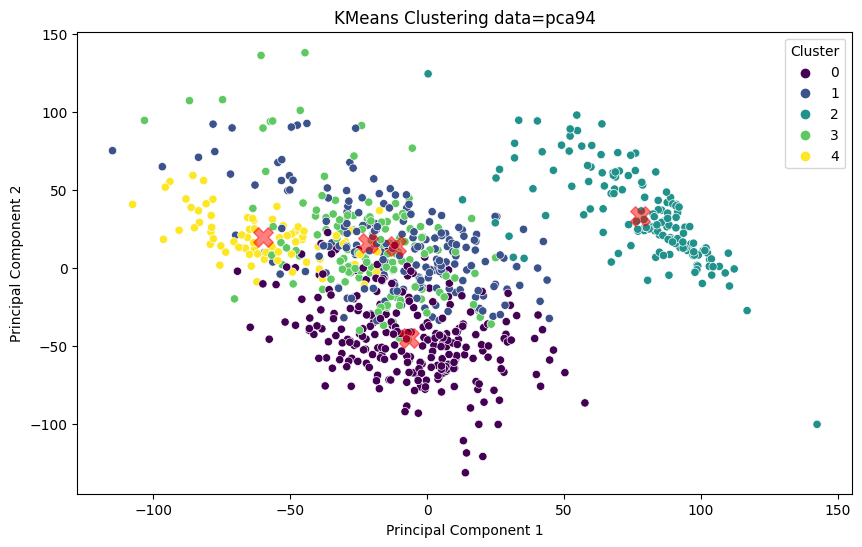

In [212]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', palette='viridis', data=pca94)
centerss = kmeans_94.cluster_centers_
plt.scatter(centerss[:, 0], centerss[:, 1], c='red', s=200, alpha=0.5, marker='X')
plt.title('KMeans Clustering data=pca94')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

In [213]:
#!pip install pyclustering


# Assuming X_142 is the data used for clustering (replace it with your actual data)
#X_142 = pca142.drop('Cancer Type', axis=1)

# Get cluster labels
cluster_labels = pca142['Cluster']

# Silhouette Score
silhouette_avg = silhouette_score(X_142, cluster_labels)
print(f"Silhouette Score: {silhouette_avg}")


# Dunn Index
def dunn_index(X, labels):
    pairwise_distances = squareform(pdist(X))
    min_inter_cluster_distance = np.inf
    max_intra_cluster_diameter = 0

    for cluster_id in np.unique(labels):
        cluster_points = X[labels == cluster_id]
        intra_cluster_distances = pairwise_distances[np.ix_(labels == cluster_id, labels == cluster_id)]

        max_intra_cluster_diameter = max(max_intra_cluster_diameter, np.max(intra_cluster_distances))

        for other_cluster_id in np.unique(labels):
            if cluster_id != other_cluster_id:
                inter_cluster_distances = pairwise_distances[np.ix_(labels == cluster_id, labels == other_cluster_id)]
                min_inter_cluster_distance = min(min_inter_cluster_distance, np.min(inter_cluster_distances))

    dunn_index = min_inter_cluster_distance / max_intra_cluster_diameter
    return dunn_index

dunn_index_value = dunn_index(X_142.values, cluster_labels.values)
print(f"Dunn Index: {dunn_index_value}")

# Corrected Rand Index
rand_index = adjusted_rand_score(pca142['Cancer Type'], pca142['Cluster'])
print(f"Rand Index: {rand_index}")


Silhouette Score: 0.19633379568778891
Dunn Index: 0.17612552520095384
Rand Index: 0.7969795067048849


In [214]:
cluster_labels_94 = pca94['Cluster']

# Silhouette Score (higher value, better clustering)
silhouette_avg_94 = silhouette_score(X_94, cluster_labels_94)
print(f"Silhouette Score: {silhouette_avg_94}")

# Dunn Index (higher, better: indicates that the clusters are compact )
def dunn_index(X, labels):
    pairwise_distances = squareform(pdist(X))
    min_inter_cluster_distance = np.inf
    max_intra_cluster_diameter = 0

    for cluster_id in np.unique(labels):
        cluster_points = X[labels == cluster_id]
        intra_cluster_distances = pairwise_distances[np.ix_(labels == cluster_id, labels == cluster_id)]

        max_intra_cluster_diameter = max(max_intra_cluster_diameter, np.max(intra_cluster_distances))

        for other_cluster_id in np.unique(labels):
            if cluster_id != other_cluster_id:
                inter_cluster_distances = pairwise_distances[np.ix_(labels == cluster_id, labels == other_cluster_id)]
                min_inter_cluster_distance = min(min_inter_cluster_distance, np.min(inter_cluster_distances))

    dunn_index = min_inter_cluster_distance / max_intra_cluster_diameter
    return dunn_index

dunn_index_value_94 = dunn_index(X_94.values, cluster_labels_94.values)
print(f"Dunn Index: {dunn_index_value_94}")

# Corrected Rand Index
rand_index_94 = adjusted_rand_score(pca94['Cancer Type'], pca94['Cluster'])
print(f"Rand Index: {rand_index_94}")

Silhouette Score: 0.21092281192471518
Dunn Index: 0.1702820362126447
Rand Index: 0.8025596675531856


# PAM

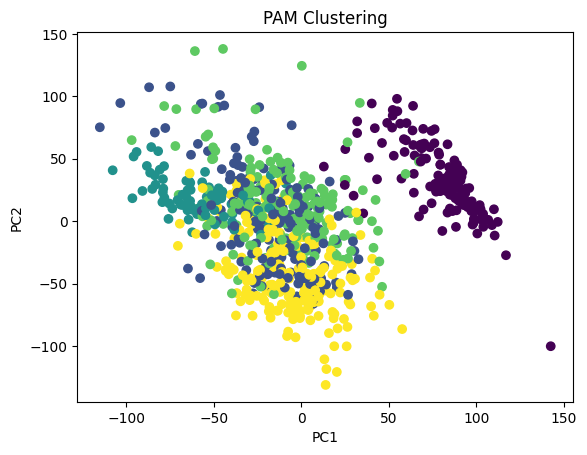

In [215]:
#!pip install scikit-learn-extra


# Initialize the KMedoids model
kmedoids = KMedoids(n_clusters=5, random_state=42)

# Fit the model to your data
kmedoids.fit(X_142)

# Get cluster labels
cluster_labels = kmedoids.labels_

# Add cluster labels to the DataFrame
pca142['PAM_Cluster'] = cluster_labels

# Visualize the clusters (you can choose different components for visualization)
plt.scatter(X_142['PC1'], X_142['PC2'], c=cluster_labels, cmap='viridis')
plt.title('PAM Clustering')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [216]:
# Get cluster labels
pam_cluster_labels = pca142['PAM_Cluster']

# Corrected Rand Index
corrected_rand_index_pam = adjusted_rand_score(pca142['Cancer Type'], pam_cluster_labels)
print(f"Corrected Rand Index (PAM): {corrected_rand_index_pam}")

# Meila’s VI
# Note: normalized_mutual_info_score is used as Meila’s VI
meila_vi_pam = normalized_mutual_info_score(pca142['Cancer Type'], pam_cluster_labels)
print(f"Meila’s VI (PAM): {meila_vi_pam}")

Corrected Rand Index (PAM): 0.47944988284408463
Meila’s VI (PAM): 0.6264203574872289


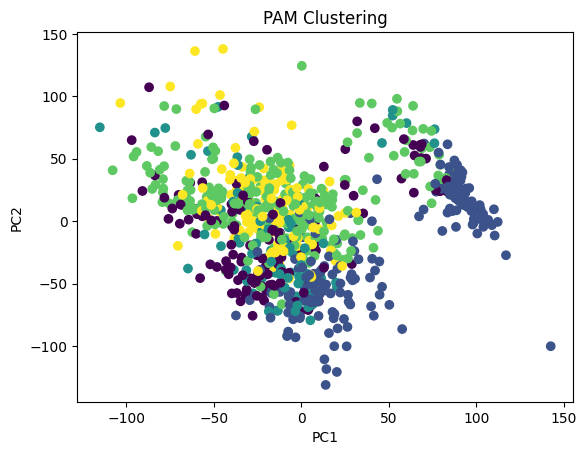

In [217]:

# Fit the model to your data
kmedoids.fit(X_94)

# Get cluster labels
cluster_labelss = kmedoids.labels_

# Add cluster labels to the DataFrame
pca94['PAM_Cluster'] = cluster_labelss

# Visualize the clusters (you can choose different components for visualization)
plt.scatter(X_94['PC1'], X_94['PC2'], c=cluster_labelss, cmap='viridis')
plt.title('PAM Clustering')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


In [218]:
# Get cluster labels
pam_cluster_labels = pca94['PAM_Cluster']

# Corrected Rand Index
corrected_rand_index_pam = adjusted_rand_score(pca94['Cancer Type'], pam_cluster_labels)
print(f"Corrected Rand Index (PAM): {corrected_rand_index_pam}")

# Meila’s VI
# Note: normalized_mutual_info_score is used as Meila’s VI
meila_vi_pam = normalized_mutual_info_score(pca94['Cancer Type'], pam_cluster_labels)
print(f"Meila’s VI (PAM): {meila_vi_pam}")

Corrected Rand Index (PAM): 0.3478160850805757
Meila’s VI (PAM): 0.4971241327911052


# HCLUS

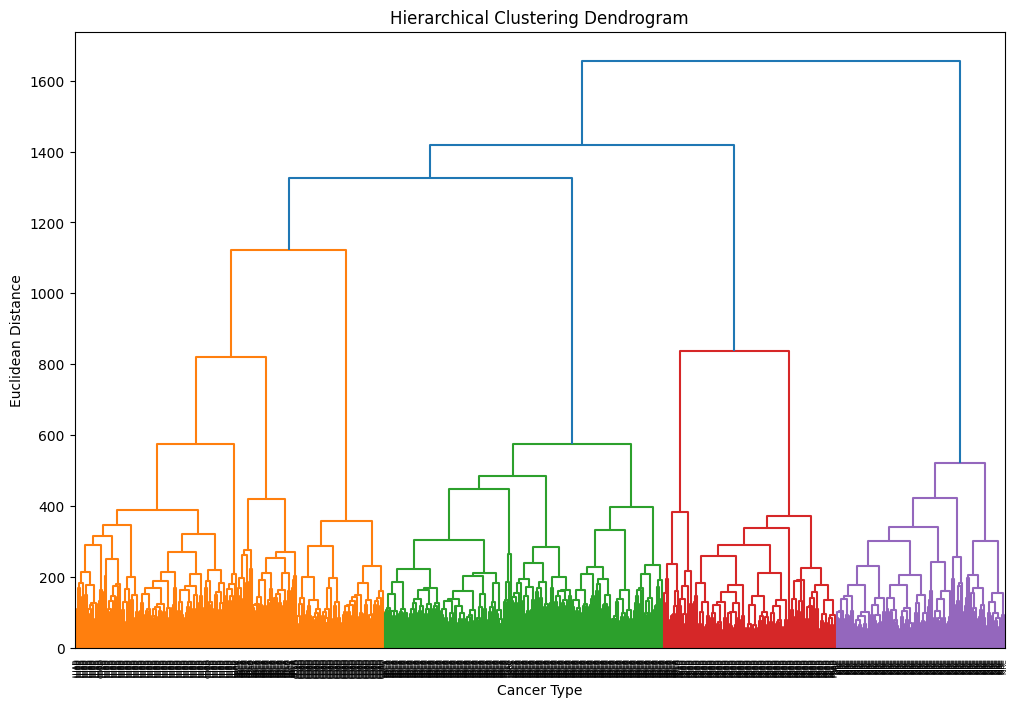

In [219]:

# Perform hierarchical clustering
linkage_matrix = linkage(X_142, method='ward', metric='euclidean')

# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, orientation='top', labels=pca142['Cancer Type'].tolist(), distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Cancer Type')
plt.ylabel('Euclidean Distance')
plt.show()

In [220]:
# Get the cluster labels from the hierarchical clustering
hierarchical_labels = fcluster(linkage_matrix, 5, criterion='maxclust')
# Corrected Rand Index
corrected_rand_index_hierarchical = adjusted_rand_score(pca142['Cancer Type'], hierarchical_labels)
print(f"Corrected Rand Index (Hierarchical): {corrected_rand_index_hierarchical}")

# Meila’s VI
meila_vi_hierarchical = normalized_mutual_info_score(pca142['Cancer Type'], hierarchical_labels)
print(f"Meila’s VI (Hierarchical): {meila_vi_hierarchical}")

Corrected Rand Index (Hierarchical): 0.7783807684679684
Meila’s VI (Hierarchical): 0.8440639545408481


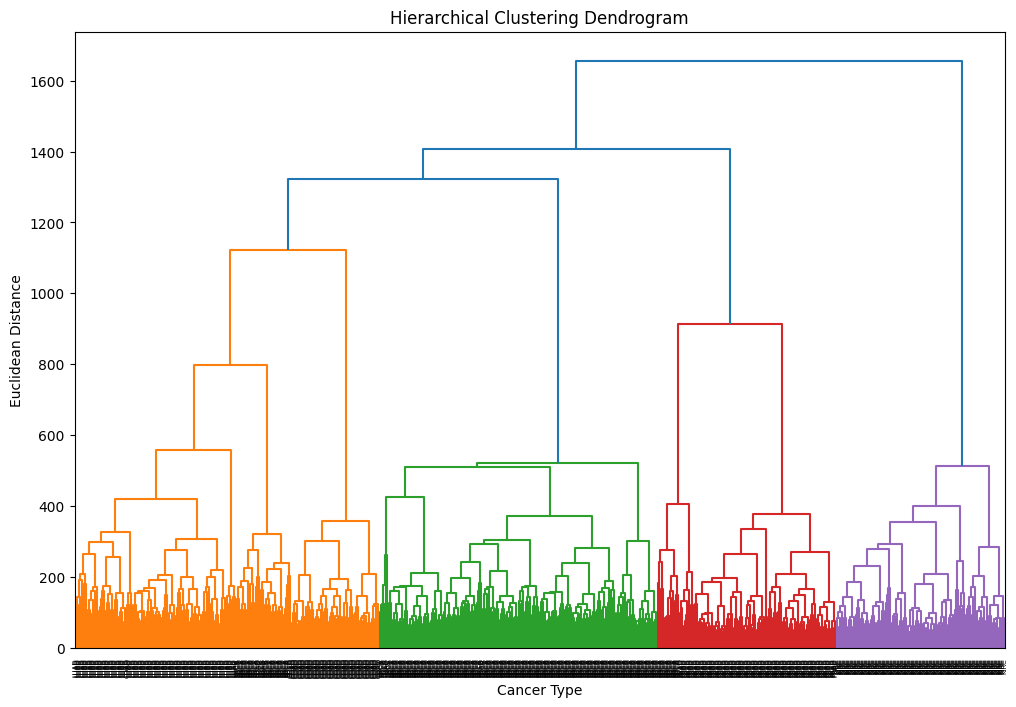

In [221]:
# Perform hierarchical clustering
linkage_matrix2 = linkage(X_94, method='ward', metric='euclidean')

# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix2, orientation='top', labels=pca94['Cancer Type'].tolist(), distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Cancer Type')
plt.ylabel('Euclidean Distance')
plt.show()

In [222]:
# Get the cluster labels from the hierarchical clustering
hierarchical_labels2 = fcluster(linkage_matrix2, 5, criterion='maxclust')
# Corrected Rand Index
corrected_rand_index_hierarchical = adjusted_rand_score(pca94['Cancer Type'], hierarchical_labels2)
print(f"Corrected Rand Index (Hierarchical): {corrected_rand_index_hierarchical}")

# Meila’s VI
meila_vi_hierarchical = normalized_mutual_info_score(pca94['Cancer Type'], hierarchical_labels2)
print(f"Meila’s VI (Hierarchical): {meila_vi_hierarchical}")

Corrected Rand Index (Hierarchical): 0.7701044659708636
Meila’s VI (Hierarchical): 0.835584820324539


# Random forest

In [223]:


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_142, pca142['Cancer Type'], test_size=0.2, random_state=1)

# Create and train the Random Forest model
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=1)
random_forest_model.fit(X_train, y_train)

# Make predictions
rf_predictions = random_forest_model.predict(X_test)

# Evaluate the model
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Random Forest Accuracy: {rf_accuracy}")
print(classification_report(y_test, rf_predictions))


Random Forest Accuracy: 0.9565217391304348
              precision    recall  f1-score   support

        BRCA       0.89      1.00      0.94        55
        COAD       1.00      1.00      1.00        17
        KIRC       1.00      0.88      0.94        25
        LUAD       1.00      0.91      0.95        32
        PRAD       1.00      0.97      0.98        32

    accuracy                           0.96       161
   macro avg       0.98      0.95      0.96       161
weighted avg       0.96      0.96      0.96       161



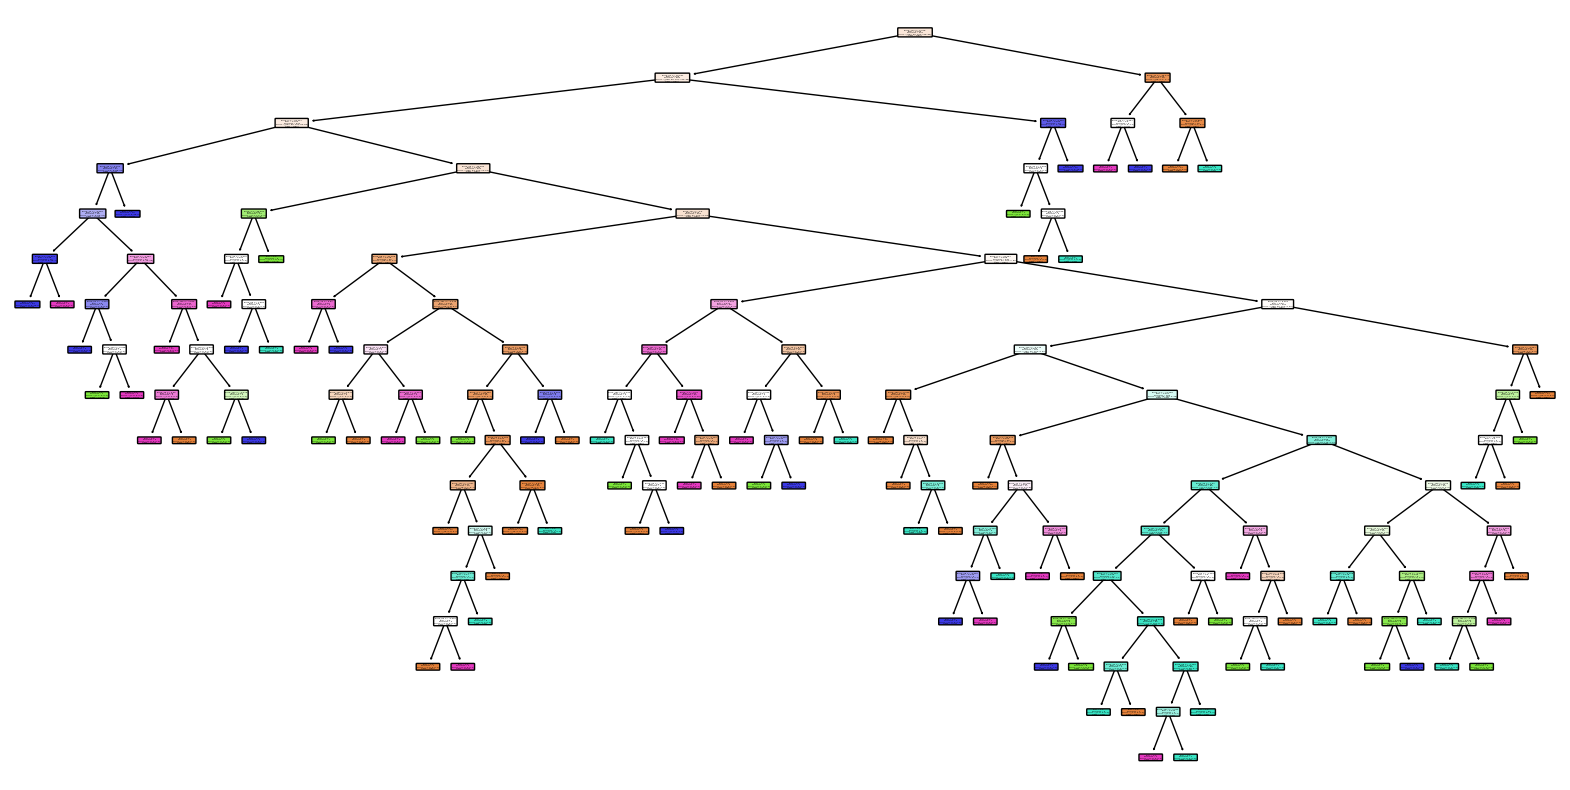

In [230]:
from sklearn.preprocessing import LabelEncoder

# Define and fit the encoder
encoder = LabelEncoder()
encoder.fit(y_train)

plt.figure(figsize=(20, 10))
plot_tree(random_forest_model.estimators_[0], filled=True, feature_names=X.columns, class_names=encoder.classes_, rounded=True)
plt.show()

# Logistic regression

In [231]:


# Create and train the Logistic Regression model
logistic_regression_model = LogisticRegression(max_iter=1000, random_state=1)
logistic_regression_model.fit(X_train, y_train)

# Make predictions
lr_predictions = logistic_regression_model.predict(X_test)

# Evaluate the model
lr_accuracy = accuracy_score(y_test, lr_predictions)
print(f"Logistic Regression Accuracy: {lr_accuracy}")
print(classification_report(y_test, lr_predictions))


Logistic Regression Accuracy: 1.0
              precision    recall  f1-score   support

        BRCA       1.00      1.00      1.00        55
        COAD       1.00      1.00      1.00        17
        KIRC       1.00      1.00      1.00        25
        LUAD       1.00      1.00      1.00        32
        PRAD       1.00      1.00      1.00        32

    accuracy                           1.00       161
   macro avg       1.00      1.00      1.00       161
weighted avg       1.00      1.00      1.00       161



# KNN

In [232]:


# Create and train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Make predictions
knn_predictions = knn_model.predict(X_test)

# Evaluate the model
knn_accuracy = accuracy_score(y_test, knn_predictions)
print(f"KNN Accuracy: {knn_accuracy}")
print(classification_report(y_test, knn_predictions))


KNN Accuracy: 0.9937888198757764
              precision    recall  f1-score   support

        BRCA       0.98      1.00      0.99        55
        COAD       1.00      1.00      1.00        17
        KIRC       1.00      0.96      0.98        25
        LUAD       1.00      1.00      1.00        32
        PRAD       1.00      1.00      1.00        32

    accuracy                           0.99       161
   macro avg       1.00      0.99      0.99       161
weighted avg       0.99      0.99      0.99       161



In [233]:
# Save pca142 to CSV
pca142.to_csv(r'/Users/minhnguyetnguyen/Documents/DA_Langara/Term_3/finaldana/DANA_4840/pca142.csv', index=False)

# Save pca94 to CSV
pca94.to_csv(r'/Users/minhnguyetnguyen/Documents/DA_Langara/Term_3/finaldana/DANA_4840/pca94.csv', index=False)
